In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


In [2]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')

/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
X.dtype, y.dtype

(dtype('uint8'), dtype('uint8'))

In [4]:
X = X.copy() / 255.

Given the dtypes, there is no possibility of negative values in the dataset. 

## Introduction
Dataset description: 
* 60k training images 
* 10k test set
* 28x28 or 784 pixels per image

Class labels: 
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot



In [5]:
X.shape, y.shape

((60000, 784), (60000,))

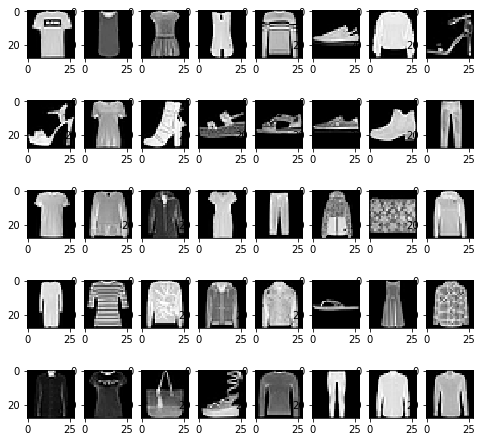

In [6]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5

for i in range(1, columns*rows +1):
    img = X[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


## Proof of concept comparing the MLP from sklearn 

In [7]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [8]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

In [9]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 200 * (epoch_sz // b_sz) 
print_interval = 1 * (epoch_sz // b_sz) 

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=sigmoid)
soft    (input=128, neurons=10, activation=sigmoid)
-------------------------------

Shuffled
It: 187 Batch: 187 Epoch 0 Train Loss: 0.25301649 lr: 0.000100 Val Loss: 0.19052737 Val Acc 0.70158333
It: 374 Batch: 186 Epoch 1 Train Loss: 0.18897856 lr: 0.000100 Val Loss: 0.15255518 Val Acc 0.72125000
It: 561 Batch: 185 Epoch 2 Train Loss: 0.16512633 lr: 0.000100 Val Loss: 0.13488028 Val Acc 0.72983333
It: 748 Batch: 184 Epoch 3 Train Loss: 0.15106193 lr: 0.000100 Val Loss: 0.12479027 Val Acc 0.74275000
It: 935 Batch: 183 Epoch 4 Train Loss: 0.14175464 lr: 0.000100 Val Loss: 0.11856167 Val Acc 0.75158333
It: 1122 Batch: 182 Epoch 5 Train Loss: 0.13475535 lr: 0.000100 Val Loss: 0.11401405 Val Acc 0.75716667
It: 1309 Batch: 181 Epoch 6 Train Loss: 0.12951390 lr: 0.000100 Val Loss: 0.11004975 Val Acc 0.76616667
It: 1496 Batch: 180 Epoch 7 Train Loss: 0.12463897 lr: 0.000100 Val Loss: 0.10751946

It: 14586 Batch: 110 Epoch 77 Train Loss: 0.07856802 lr: 0.000100 Val Loss: 0.07834524 Val Acc 0.84791667
It: 14773 Batch: 109 Epoch 78 Train Loss: 0.07712362 lr: 0.000100 Val Loss: 0.07852382 Val Acc 0.84733333
It: 14960 Batch: 108 Epoch 79 Train Loss: 0.07789263 lr: 0.000100 Val Loss: 0.07837700 Val Acc 0.84808333
It: 15147 Batch: 107 Epoch 80 Train Loss: 0.07811976 lr: 0.000100 Val Loss: 0.07828970 Val Acc 0.84900000
It: 15334 Batch: 106 Epoch 81 Train Loss: 0.07721858 lr: 0.000100 Val Loss: 0.07788778 Val Acc 0.84841667
It: 15521 Batch: 105 Epoch 82 Train Loss: 0.07755511 lr: 0.000100 Val Loss: 0.07776644 Val Acc 0.84791667
It: 15708 Batch: 104 Epoch 83 Train Loss: 0.07735155 lr: 0.000100 Val Loss: 0.07734719 Val Acc 0.84900000
It: 15895 Batch: 103 Epoch 84 Train Loss: 0.07617717 lr: 0.000100 Val Loss: 0.07730436 Val Acc 0.85008333
It: 16082 Batch: 102 Epoch 85 Train Loss: 0.07786504 lr: 0.000100 Val Loss: 0.07729873 Val Acc 0.85000000
It: 16269 Batch: 101 Epoch 86 Train Loss: 0.07

It: 29172 Batch: 32 Epoch 155 Train Loss: 0.06917563 lr: 0.000100 Val Loss: 0.07185141 Val Acc 0.86150000
It: 29359 Batch: 31 Epoch 156 Train Loss: 0.06946461 lr: 0.000100 Val Loss: 0.07226162 Val Acc 0.86275000
It: 29546 Batch: 30 Epoch 157 Train Loss: 0.06825215 lr: 0.000100 Val Loss: 0.07183011 Val Acc 0.86216667
It: 29733 Batch: 29 Epoch 158 Train Loss: 0.06906504 lr: 0.000100 Val Loss: 0.07191748 Val Acc 0.86275000
It: 29920 Batch: 28 Epoch 159 Train Loss: 0.06839328 lr: 0.000100 Val Loss: 0.07169351 Val Acc 0.86208333
It: 30107 Batch: 27 Epoch 160 Train Loss: 0.06879534 lr: 0.000100 Val Loss: 0.07187793 Val Acc 0.86291667
It: 30294 Batch: 26 Epoch 161 Train Loss: 0.06828735 lr: 0.000100 Val Loss: 0.07223477 Val Acc 0.86341667
It: 30481 Batch: 25 Epoch 162 Train Loss: 0.06885117 lr: 0.000100 Val Loss: 0.07191147 Val Acc 0.86400000
It: 30668 Batch: 24 Epoch 163 Train Loss: 0.06824855 lr: 0.000100 Val Loss: 0.07136615 Val Acc 0.86291667
It: 30855 Batch: 23 Epoch 164 Train Loss: 0.06

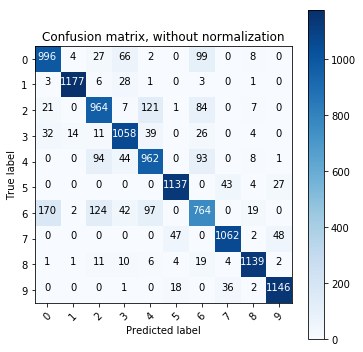

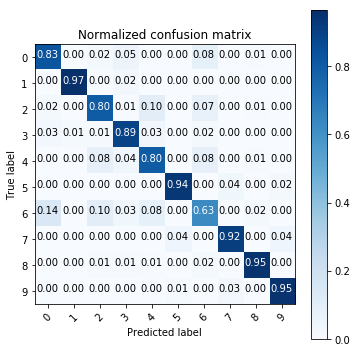

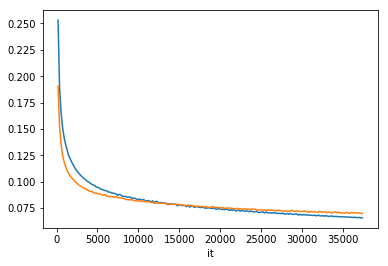

In [10]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 128, 'sigmoid',  label="H1")
o1 = network.Layer(128, nclasses, 'sigmoid', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=relu)
soft    (input=128, neurons=10, activation=sigmoid)
-------------------------------

Shuffled
It: 187 Batch: 187 Epoch 0 Train Loss: 0.17824179 lr: 0.000100 Val Loss: 0.11920152 Val Acc 0.74466667
It: 374 Batch: 186 Epoch 1 Train Loss: 0.12298940 lr: 0.000100 Val Loss: 0.10390313 Val Acc 0.78891667
It: 561 Batch: 185 Epoch 2 Train Loss: 0.10911948 lr: 0.000100 Val Loss: 0.09742522 Val Acc 0.80391667
It: 748 Batch: 184 Epoch 3 Train Loss: 0.10166811 lr: 0.000100 Val Loss: 0.09285887 Val Acc 0.81650000
It: 935 Batch: 183 Epoch 4 Train Loss: 0.09651715 lr: 0.000100 Val Loss: 0.09312048 Val Acc 0.81975000
It: 1122 Batch: 182 Epoch 5 Train Loss: 0.09301030 lr: 0.000100 Val Loss: 0.09156771 Val Acc 0.82383333
It: 1309 Batch: 181 Epoch 6 Train Loss: 0.09020375 lr: 0.000100 Val Loss: 0.08658157 Val Acc 0.83233333
It: 1496 Batch: 180 Epoch 7 Train Loss: 0.08768014 lr: 0.000100 Val Loss: 0.08657265 Va

It: 14586 Batch: 110 Epoch 77 Train Loss: 0.05558239 lr: 0.000100 Val Loss: 0.06716453 Val Acc 0.87800000
It: 14773 Batch: 109 Epoch 78 Train Loss: 0.05659022 lr: 0.000100 Val Loss: 0.06547529 Val Acc 0.88241667
It: 14960 Batch: 108 Epoch 79 Train Loss: 0.05541680 lr: 0.000100 Val Loss: 0.06579870 Val Acc 0.88100000
It: 15147 Batch: 107 Epoch 80 Train Loss: 0.05605213 lr: 0.000100 Val Loss: 0.06866735 Val Acc 0.87775000
It: 15334 Batch: 106 Epoch 81 Train Loss: 0.05581711 lr: 0.000100 Val Loss: 0.06600347 Val Acc 0.88200000
It: 15521 Batch: 105 Epoch 82 Train Loss: 0.05460405 lr: 0.000100 Val Loss: 0.06600884 Val Acc 0.88175000
It: 15708 Batch: 104 Epoch 83 Train Loss: 0.05496374 lr: 0.000100 Val Loss: 0.06490950 Val Acc 0.88225000
It: 15895 Batch: 103 Epoch 84 Train Loss: 0.05490154 lr: 0.000100 Val Loss: 0.06501102 Val Acc 0.88325000
It: 16082 Batch: 102 Epoch 85 Train Loss: 0.05510747 lr: 0.000100 Val Loss: 0.06506429 Val Acc 0.88433333
It: 16269 Batch: 101 Epoch 86 Train Loss: 0.05

It: 29172 Batch: 32 Epoch 155 Train Loss: 0.04563432 lr: 0.000100 Val Loss: 0.06523377 Val Acc 0.88875000
It: 29359 Batch: 31 Epoch 156 Train Loss: 0.04608485 lr: 0.000100 Val Loss: 0.06328180 Val Acc 0.89091667
It: 29546 Batch: 30 Epoch 157 Train Loss: 0.04543713 lr: 0.000100 Val Loss: 0.06389936 Val Acc 0.88983333
It: 29733 Batch: 29 Epoch 158 Train Loss: 0.04616554 lr: 0.000100 Val Loss: 0.06597647 Val Acc 0.88808333
It: 29920 Batch: 28 Epoch 159 Train Loss: 0.04558133 lr: 0.000100 Val Loss: 0.06237873 Val Acc 0.88966667
It: 30107 Batch: 27 Epoch 160 Train Loss: 0.04520135 lr: 0.000100 Val Loss: 0.06303063 Val Acc 0.88958333
It: 30294 Batch: 26 Epoch 161 Train Loss: 0.04523901 lr: 0.000100 Val Loss: 0.06349405 Val Acc 0.88825000
It: 30481 Batch: 25 Epoch 162 Train Loss: 0.04514807 lr: 0.000100 Val Loss: 0.06409474 Val Acc 0.88891667
It: 30668 Batch: 24 Epoch 163 Train Loss: 0.04489855 lr: 0.000100 Val Loss: 0.06303492 Val Acc 0.89016667
It: 30855 Batch: 23 Epoch 164 Train Loss: 0.04

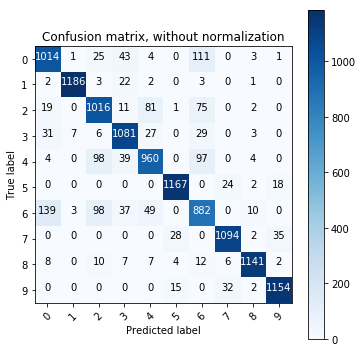

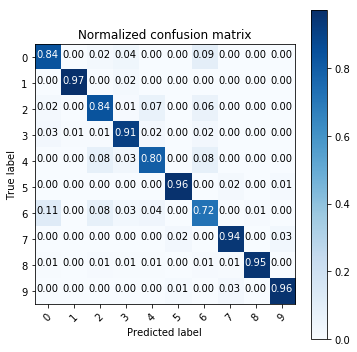

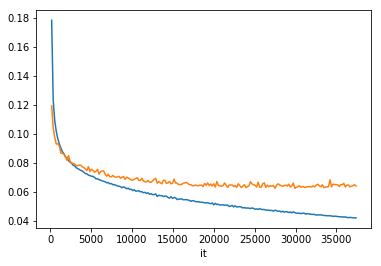

In [11]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 128, 'relu',  label="H1")
o1 = network.Layer(128, nclasses, 'sigmoid', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Model Summary
-------------------------------
H1      (input=784, neurons=128, activation=tanh)
soft    (input=128, neurons=10, activation=sigmoid)
-------------------------------

Shuffled
It: 187 Batch: 187 Epoch 0 Train Loss: 0.22935141 lr: 0.000100 Val Loss: 0.18522097 Val Acc 0.64825000
It: 374 Batch: 186 Epoch 1 Train Loss: 0.19580348 lr: 0.000100 Val Loss: 0.16756642 Val Acc 0.67075000
It: 561 Batch: 185 Epoch 2 Train Loss: 0.18445747 lr: 0.000100 Val Loss: 0.16368630 Val Acc 0.66433333
It: 748 Batch: 184 Epoch 3 Train Loss: 0.17999148 lr: 0.000100 Val Loss: 0.15984117 Val Acc 0.66600000
It: 935 Batch: 183 Epoch 4 Train Loss: 0.17716492 lr: 0.000100 Val Loss: 0.15627664 Val Acc 0.67458333
It: 1122 Batch: 182 Epoch 5 Train Loss: 0.17626895 lr: 0.000100 Val Loss: 0.15616693 Val Acc 0.67541667
It: 1309 Batch: 181 Epoch 6 Train Loss: 0.17498280 lr: 0.000100 Val Loss: 0.15359170 Val Acc 0.68566667
It: 1496 Batch: 180 Epoch 7 Train Loss: 0.17254510 lr: 0.000100 Val Loss: 0.14906368 Va

It: 14586 Batch: 110 Epoch 77 Train Loss: 0.15971193 lr: 0.000100 Val Loss: 0.15928317 Val Acc 0.65216667
It: 14773 Batch: 109 Epoch 78 Train Loss: 0.16043282 lr: 0.000100 Val Loss: 0.15928896 Val Acc 0.65341667
It: 14960 Batch: 108 Epoch 79 Train Loss: 0.16066133 lr: 0.000100 Val Loss: 0.15895101 Val Acc 0.65541667
It: 15147 Batch: 107 Epoch 80 Train Loss: 0.15983034 lr: 0.000100 Val Loss: 0.15889902 Val Acc 0.65316667
It: 15334 Batch: 106 Epoch 81 Train Loss: 0.15984183 lr: 0.000100 Val Loss: 0.15878815 Val Acc 0.65350000
It: 15521 Batch: 105 Epoch 82 Train Loss: 0.15965214 lr: 0.000100 Val Loss: 0.15847916 Val Acc 0.65666667
It: 15708 Batch: 104 Epoch 83 Train Loss: 0.15932192 lr: 0.000100 Val Loss: 0.15866968 Val Acc 0.65533333
It: 15895 Batch: 103 Epoch 84 Train Loss: 0.15860414 lr: 0.000100 Val Loss: 0.15869250 Val Acc 0.65416667
It: 16082 Batch: 102 Epoch 85 Train Loss: 0.15984717 lr: 0.000100 Val Loss: 0.15847351 Val Acc 0.65575000
It: 16269 Batch: 101 Epoch 86 Train Loss: 0.15

It: 29172 Batch: 32 Epoch 155 Train Loss: 0.15388016 lr: 0.000100 Val Loss: 0.15653638 Val Acc 0.66133333
It: 29359 Batch: 31 Epoch 156 Train Loss: 0.15425434 lr: 0.000100 Val Loss: 0.15614171 Val Acc 0.66075000
It: 29546 Batch: 30 Epoch 157 Train Loss: 0.15410859 lr: 0.000100 Val Loss: 0.15630780 Val Acc 0.66083333
It: 29733 Batch: 29 Epoch 158 Train Loss: 0.15418274 lr: 0.000100 Val Loss: 0.15589074 Val Acc 0.66066667
It: 29920 Batch: 28 Epoch 159 Train Loss: 0.15398468 lr: 0.000100 Val Loss: 0.15596566 Val Acc 0.66166667
It: 30107 Batch: 27 Epoch 160 Train Loss: 0.15369178 lr: 0.000100 Val Loss: 0.15558467 Val Acc 0.66058333
It: 30294 Batch: 26 Epoch 161 Train Loss: 0.15376062 lr: 0.000100 Val Loss: 0.15549129 Val Acc 0.66483333
It: 30481 Batch: 25 Epoch 162 Train Loss: 0.15348245 lr: 0.000100 Val Loss: 0.15541857 Val Acc 0.66458333
It: 30668 Batch: 24 Epoch 163 Train Loss: 0.15328031 lr: 0.000100 Val Loss: 0.15525341 Val Acc 0.66208333
It: 30855 Batch: 23 Epoch 164 Train Loss: 0.15

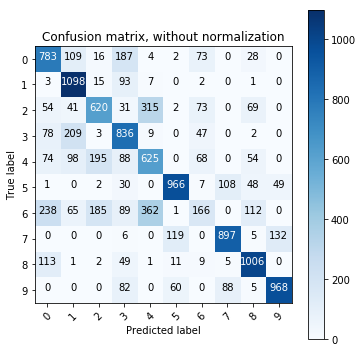

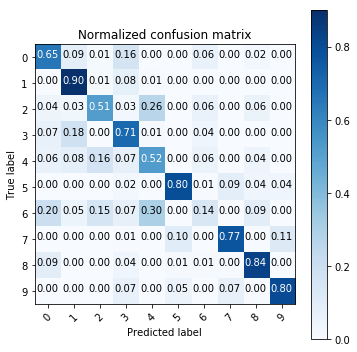

In [12]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 128, 'tanh',  label="H1")
o1 = network.Layer(128, nclasses, 'sigmoid', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)